### Inputs

In [50]:
from CSIKit.filters.passband import lowpass
from CSIKit.filters.statistical import running_mean
from CSIKit.util.filters import hampel
from CSIKit.reader import get_reader
from CSIKit.tools.batch_graph import *
from CSIKit.tools.convert_csv import *
from CSIKit.util import csitools

import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import pandas as pd
import seaborn as sb

### Files lists

In [51]:
pcap_files = ["csi_tests_pcap/" + i for i in listdir('csi_tests_pcap')]
csv_files = ["csi_tests_csv/" + i for i in listdir('csi_tests_csv')]
pcap_files.sort(key=lambda x: (ord(x[-13])*10) + int(x[-7] + x[-6]) if x[-7].isdigit() else (ord(x[-12])*10) + int(x[-6]))
csv_files.sort(key=lambda x: (ord(x[-12])*10) + int(x[-6] + x[-5]) if x[-6].isdigit() else (ord(x[-11])*10) + int(x[-5]))

### List of csv file dataframes

In [52]:
dataframes = {}

for filename in csv_files:
    cur_df = pd.read_csv(filename, index_col=None, header=0)
    cur_df.columns = np.arange(0,len(cur_df.columns))
    dataframes[filename[14:]] = cur_df


In [53]:
dataframes["Walking_along_12.csv"]

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,29.566486,42.784106,32.504200,26.830470,26.522463,30.507663,57.728056,57.215435,57.552603,57.154100,...,59.755246,59.938527,59.965484,59.639091,59.444457,34.256972,18.325089,23.443923,23.117539,30.468852
1,34.353665,42.784106,56.212895,55.861753,55.508567,55.167165,54.975267,54.828107,54.659373,54.569624,...,57.490201,57.442899,57.418840,57.361622,57.237708,57.103552,56.919554,56.859673,56.752328,41.958997
2,30.103000,42.784106,31.222159,30.141003,27.730547,22.552725,57.000501,57.377014,56.614719,56.164545,...,60.034368,59.726735,59.447767,58.884115,59.465397,29.283959,31.287223,24.668676,20.374265,13.979400
3,38.813847,42.784106,55.538855,55.428976,55.300588,55.123241,54.890580,54.614160,54.292289,53.928815,...,57.106867,57.008983,56.950226,56.941039,56.852848,56.721542,56.545664,56.378588,56.213643,29.138139
4,19.030900,42.784106,24.099331,26.821451,21.335389,32.385479,57.457655,57.307056,56.677004,56.796931,...,59.689571,59.235222,59.411441,59.189734,58.597122,22.944662,22.278867,30.795430,29.206450,24.955443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,27.267272,42.784106,58.339295,58.252183,58.136537,58.072007,58.083548,58.200759,58.183665,58.147542,...,58.728325,58.647602,58.683111,58.515482,58.529707,58.604296,58.532418,58.544287,58.425406,36.250036
163,20.863598,42.784106,25.865873,26.989700,22.944662,20.000000,57.285567,57.069779,57.003896,57.228592,...,57.883360,58.112975,57.651237,57.532835,57.659664,18.325089,28.721563,20.969100,25.987905,13.979400
164,27.611758,42.784106,11.139434,15.682017,32.944662,32.612629,59.824594,59.898221,59.569307,59.978619,...,61.109188,60.761761,60.590986,60.509958,59.993855,12.304489,31.159432,21.367206,12.552725,17.242759
165,23.873898,42.784106,24.842998,29.894498,25.987905,26.857417,60.127782,59.694853,59.441795,59.970966,...,61.164118,60.709170,60.787591,60.446565,60.752410,28.603380,24.742163,23.010300,28.773713,22.671717


### Subcarrier correlation plots

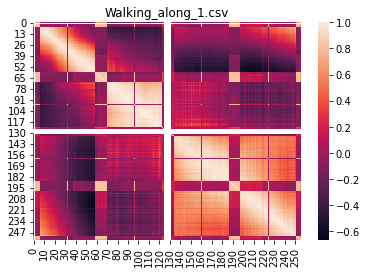


KeyboardInterrupt



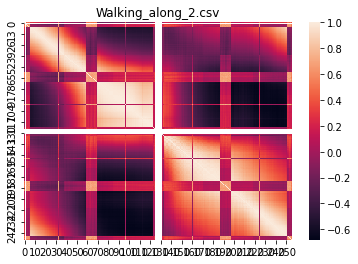

In [54]:
for filename in dataframes:
    csi_matrix = dataframes[filename]
    plt.title(filename)
    sb.heatmap(csi_matrix.corr())
    # plt.savefig(f"pictures/files_correlation/dataset_correlation-matrix_{fileName[:-4]}.jpg", bbox_inches="tight")
    plt.show()

### Amplitude heatmaps

In [ ]:
for filename in pcap_files:
    bg = BatchGraph(filename)
    bg.heatmap()

### Line plots of one subcarrier

In [ ]:
for filename in dataframes:
    dataframes[filename][0].plot.line()
    plt.show()

### Line plots of 10 subcarriers

In [ ]:
for filename in dataframes:
    for i in range (10):
        dataframes[filename][i].plot.line()
    plt.show()

### Line plots of 100 subcarriers

In [ ]:
# for filename in dataframes:
#     for i in range (100):
#         dataframes[filename][i].plot.line()
#     plt.show()